In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pylab as pl

In [4]:
#Reading the data and displaying first five rows
bank = pd.read_csv('bank.csv')
print (bank.head())

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


In [5]:
#Dividing the dataset into dependent and independent variables.
feature_names = ['age', 'job', 'marital', 'education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome','y']
X = bank[feature_names]
y = bank['y']

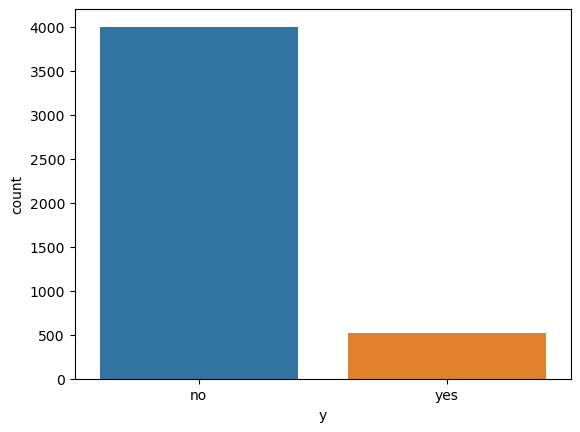

In [6]:
#Plotting the countplot using seaborn library
total = len(y)*1.
ax = sns.countplot(x="y", data=bank[feature_names])

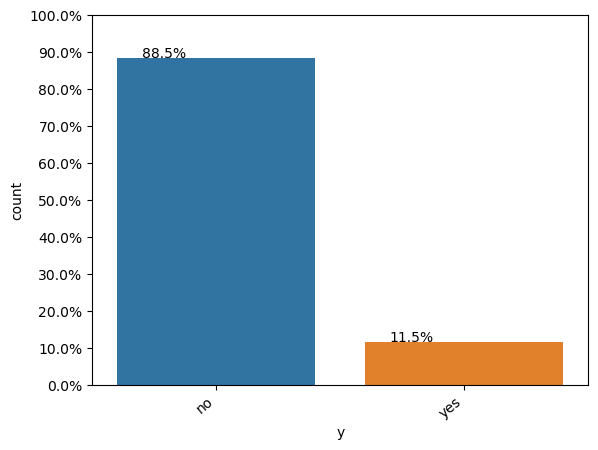

In [7]:
#Converting to percentage
#total = len(y)*1.
ax = sns.countplot(x="y", data=bank[feature_names])
for p in ax.patches:
  ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
ax.yaxis.set_ticks(np.linspace(0, total, 11))
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

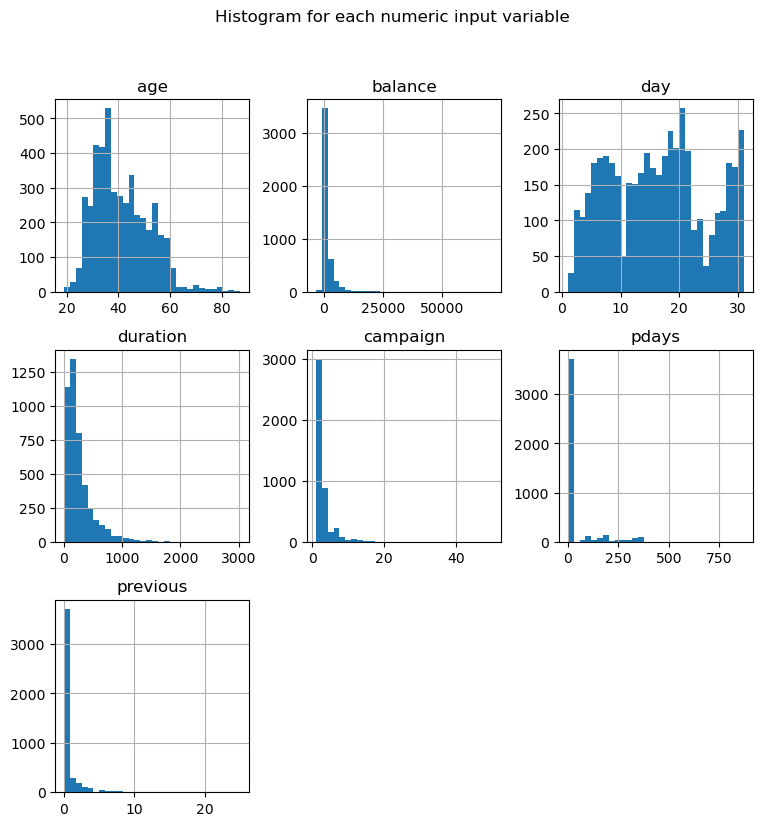

In [8]:
#plotting the histogram
bank.drop('y' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('bank_hist')
plt.show()

In [9]:
#Splitting the dataset in two separate parts
data_x = bank.iloc[:, :-1] #All columns and rows except last column
data_y = bank["y"]

In [10]:
from sklearn.model_selection import train_test_split

#Splitting the dataset in training and test data
X_rest, X_test, y_rest, y_test = train_test_split(data_x,data_y,test_size=0.2)

#Splitting the training data in training and cross-validation data
X_train, X_cv, y_train, y_cv = train_test_split(X_rest,y_rest,test_size=0.2)

In [11]:
#Converting the categorical target variable into numerical format
y_train.replace({"no":0,"yes":1},inplace=True)
y_cv.replace({"no":0,"yes":1},inplace=True)
y_test.replace({"no":0,"yes":1},inplace=True)

In [12]:
#Identifying the categorical columns in independent variables
categorical_feature_mask = data_x.dtypes==object
categorical_cols=data_x.columns[categorical_feature_mask].tolist()

In [13]:
#Performing one-hot encoding on categorical variables in the dataset using the CountVectorizer class
from sklearn.feature_extraction.text import CountVectorizer

def add_onehot_to_dataframe(sparse, df, vectorizer, name):
  '''
      This function will add the one hot encoded to the dataframe.

  '''
  for i, col in enumerate(vectorizer.get_feature_names()):
    colname = name+"_"+col
    # df[colname] = pd.SparseSeries(sparse[:, i].toarray().flatten(), fill_value=0)
    df[colname] = sparse[:, i].toarray().ravel().tolist()
  
  return df

def OneHotEncoder(categorical_cols, X_train, X_test, X_cv=None, include_cv=False):
  for i in categorical_cols:
    Vectorizer = CountVectorizer(token_pattern="[A-Za-z0-9-.]+")
    print("Encoding for feature: ", i)
    # Encoding training dataset 
    temp_cols = Vectorizer.fit_transform(X_train[i])
    X_train = add_onehot_to_dataframe(temp_cols, X_train, Vectorizer, i)
    # Encoding Cross validation dataset
    if include_cv:
      temp_cols = Vectorizer.transform(X_cv[i])
      X_cv = add_onehot_to_dataframe(temp_cols, X_cv, Vectorizer, i)
    # Encoding Test dataset
    temp_cols = Vectorizer.transform(X_test[i])
    X_test = add_onehot_to_dataframe(temp_cols, X_test, Vectorizer, i)

OneHotEncoder(categorical_cols, X_train, X_test, X_cv, True)

Encoding for feature:  job
Encoding for feature:  marital
Encoding for feature:  education
Encoding for feature:  default
Encoding for feature:  housing
Encoding for feature:  loan
Encoding for feature:  contact
Encoding for feature:  month
Encoding for feature:  poutcome


/Users/bharat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/bharat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/bharat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/bharat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarni

In [14]:
#Dropping the categorical features as the one hot encoded representation is present
X_train = X_train.drop(categorical_cols, axis=1)
X_cv = X_cv.drop(categorical_cols, axis=1)
X_test = X_test.drop(categorical_cols, axis=1)

In [15]:
#Printing the shape of the resulting training, test, and cross-validation sets
print("Shape of train: ", X_train.shape)
print("Shape of CV: ", X_cv.shape)
print("Shape of test: ", X_test.shape)

Shape of train:  (2892, 51)
Shape of CV:  (724, 51)
Shape of test:  (905, 51)


In [16]:
#Building the logistic regression model
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)

/Users/bharat/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
print(classification_report(y_test, pred))

[[677 136]
 [ 23  69]]
              precision    recall  f1-score   support

           0       0.97      0.83      0.89       813
           1       0.34      0.75      0.46        92

    accuracy                           0.82       905
   macro avg       0.65      0.79      0.68       905
weighted avg       0.90      0.82      0.85       905



In [22]:
print(confusion_matrix(y_test, pred))

[[677 136]
 [ 23  69]]


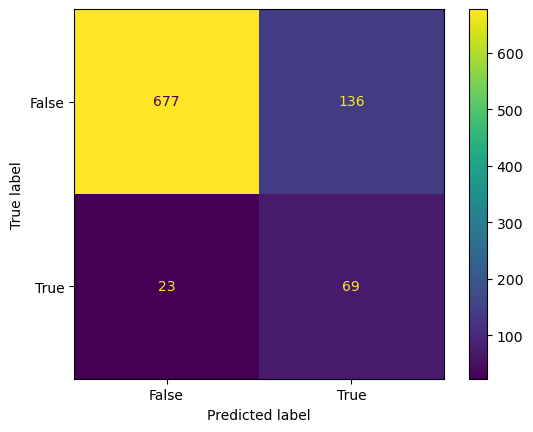

In [27]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, pred)

display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

display.plot()
plt.show()

In [28]:
y_score = model.predict_proba(X_test)[::,1]

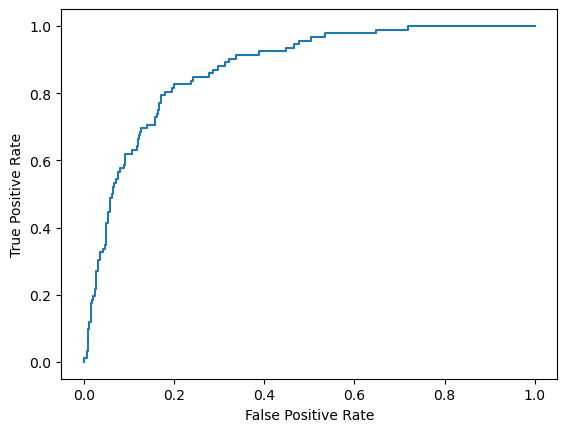

In [29]:
fpr, tpr, _ = metrics.roc_curve(y_test,y_score)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()